In [15]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd

In [16]:
def get_data(csv_path = r"C:\Users\hugop\Documents\Uni\Graphics\COMPSCI715\ViT\csvs\vivit_preds.csv"):
    df = pd.read_csv(csv_path)
    
    x_vel = df["thumbstick_left_x"].values
    y_vel = df["thumbstick_left_y"].values
    
    data = [(0, 0)] + [(x, y) for x, y in zip(x_vel, y_vel)]
        
    return data

In [17]:
data = get_data()

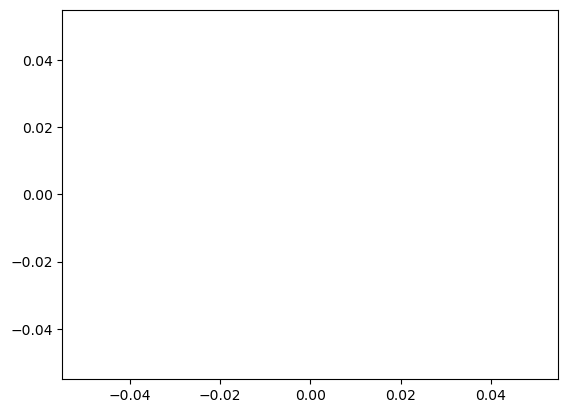

In [131]:
from matplotlib.patches import FancyArrowPatch

fig, ax = plt.subplots()

line, = ax.plot([], [], "bo--", lw=2)

def update(frame):
    curr_x, curr_y = line.get_data()
    
    new_x = curr_x + [curr_x[-1] + data[frame][0]]
    new_y = curr_y + [curr_y[-1] + data[frame][1]]


    # Clear previous arrows
    for arrow in ax.patches:
        arrow.remove()

    # Add arrows between points
    for i in range(1, len(new_x)):
        arrow = FancyArrowPatch((new_x[i-1], new_x[i-1]), (new_x[i], new_x[i]), arrowstyle='->', mutation_scale=15, color='blue')
        ax.add_patch(arrow)
    
    line.set_data(new_x, new_y)
    ax.relim()  # Recalculate the limits of the axes
    ax.autoscale_view()
    return line,

def init():
    line.set_data([0], [0])
    return line,

In [ ]:
n_frames = 20
interval_ms = 100

ani = animation.FuncAnimation(fig, update, frames=n_frames, init_func=init, blit=False, interval=interval_ms)

ani.save('test.mp4', writer='ffmpeg')

In [130]:
from IPython.display import HTML

HTML(ani.to_jshtml())

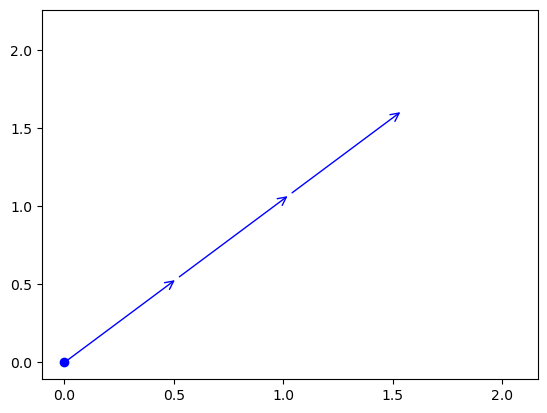

In [27]:
from matplotlib.patches import FancyArrowPatch
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

line, = ax.plot([], [], "bo", lw=2)
arrows = []  # List to store arrow objects

def init():
    # Initialize line data
    line.set_data([0], [0])

    # Create a fixed number of arrows (assuming max arrows equal to the number of frames)
    for _ in range(len(test_data)):
        arrow = FancyArrowPatch((0, 0), (0, 0), arrowstyle='->', mutation_scale=15, color='blue')
        ax.add_patch(arrow)
        arrows.append(arrow)

    return line, *arrows

def update(frame):
    curr_x, curr_y = line.get_data()

    # Compute new point positions
    new_x = list(curr_x) + [curr_x[-1] + test_data[frame][0]]
    new_y = list(curr_y) + [curr_y[-1] + test_data[frame][1]]

    for i in range(frame):
        arrows[i].set_positions((new_x[i], new_y[i]), (new_x[i + 1], new_y[i + 1]))

    # Update the line data
    line.set_data(new_x, new_y)
    ax.relim()  # Recalculate the limits of the axes
    ax.autoscale_view()
    return line, *arrows

# Create your velocity data
test_data = data[:5]

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(test_data), init_func=init, blit=False, interval=100)

from IPython.display import HTML

HTML(ani.to_jshtml())